# Interfaces, Protocols ans ABCs


## Introduction

OOP is all about interfaces, the best approach to understanding a type is knowing the methods it provides, depending on the programming lang we'll have many ways to implement an interface.

Since Python 3.8 we have four ways, summarized like this:

 - _Duck typing_: Python's default approach to typing
 - _Goose typing_: Approach supported by ABCs since Python 2.6
 - _Static typing_: Traditional approach of statically-typed languages
 - _Static duck typing_: Approach made popular by Go supported by subclasses of typing.Protocol
 
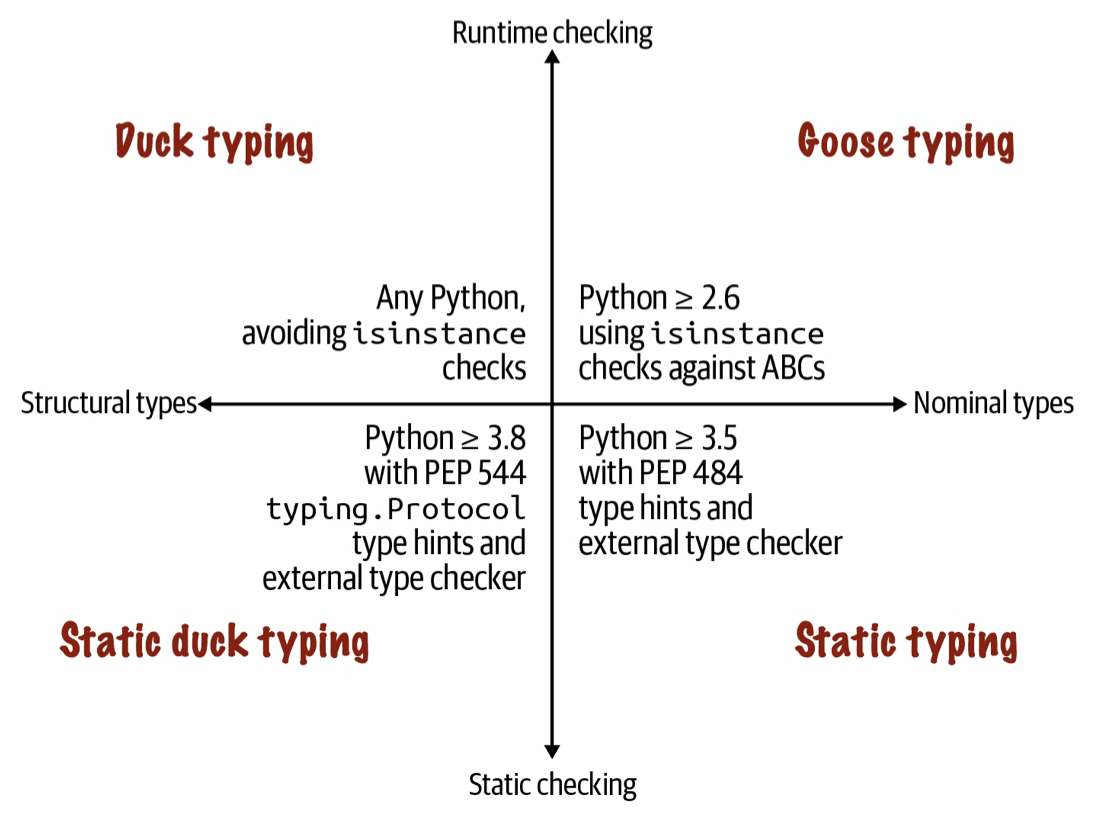

Top half of the diagram describes runtime type checking using just de Python interpreter; the bottom requires an external static type checker such as MyPy or an IDE.

Left quadrants cover typing based on the object's structure regardless the name of its class or superclass; the right quadrants depend on objects having explicitly named types.

Each of these four approaches rely on interfaces to work, but static typing can be done using only concrete types insteade of interfaces abstractions, like protocols and abstract base classes.

## Two kind of protocols

In [Chapter one](http://localhost:8888/notebooks/FluentPython/Chapter1.ipynb) we worked with a Deck class which demonstrated one object protocol, the sequence protocol, methods that allow a Python object to behave as a sequence.

Implementing a full protocol may require several methods, but often its ok to implement one part of it, let's see an example.


In [1]:
class Vowels:

    def __getitem__(self, i):
        return "AEIOU"[i]

v = Vowels()
print(v[0])
print(v[-1])

for c in v: print(c)

print("E" in v)
print("W" in v)

A
U
A
E
I
O
U
True
False


Implementing `__getitem__` is enough to allow retrieving items by index, support iteration and `in` operator, the `__getitem__` special method is really the key to the sequence protocol.

The entry for "Sequence Protocol" at the [Python/C API Reference Manual](https://docs.python.org/3/c-api/sequence.html)

```C
int PySequence_Check(PyObject *o)
```
> Return `1` if the object provides the sequence protocol, and `0` otherwise. Note that it returns `1` for Python classes with a `__getitem__()` method, unless ther are `dict` subclasses.

We expect a sequence to also support `len()` by implementing `__len__`. Our `Vowels` class has not `__len__` method, but still behaves as a sequence in certain contexts. And that ,ay be enough for our purposes.

That is why the autor likes to call a Protocol as an "informal interface".